In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [49]:
# Load dataset
df = pd.read_csv('earthquake_1995-2023.csv')
df.head()


,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [50]:
# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21336\3339086862.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')


In [51]:
# Drop columns with high missing values
columns_to_drop = ['alert', 'continent', 'country', 'location']
df.drop(columns=columns_to_drop, inplace=True)


In [52]:
df.head()

,title,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,2023-08-16 12:47:00,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,2023-07-19 00:22:00,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,2023-07-17 03:05:00,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,2023-07-16 06:48:00,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990
4,M 7.3 - Alaska Peninsula,7.3,2023-07-16 06:48:00,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960


In [53]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)


In [54]:
df.head()

,title,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,2023-08-16 12:47:00,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,2023-07-19 00:22:00,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,2023-07-17 03:05:00,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,2023-07-16 06:48:00,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990
4,M 7.3 - Alaska Peninsula,7.3,2023-07-16 06:48:00,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960


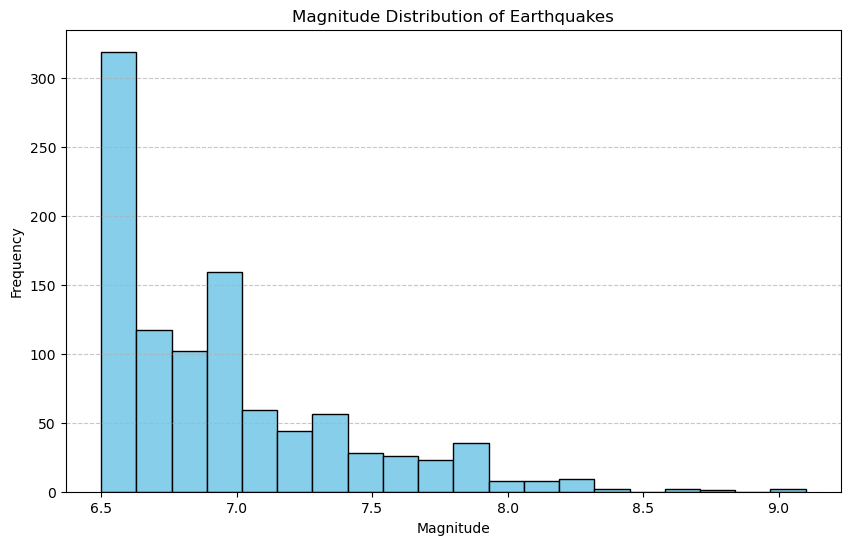

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct file path variable usage
file_path = 'earthquake_1995-2023.csv'

# Use correct quotation marks for reading the CSV
earthquake_data = pd.read_csv(file_path)  

# Drop rows where 'magnitude' column has NaN values
earthquake_data = earthquake_data.dropna(subset=['magnitude'])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(earthquake_data['magnitude'], bins=20, color='skyblue', edgecolor='black')
plt.title('Magnitude Distribution of Earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [56]:
# Encode categorical columns
label_encoder = LabelEncoder()
df['net'] = label_encoder.fit_transform(df['net'])
df['magType'] = label_encoder.fit_transform(df['magType'])


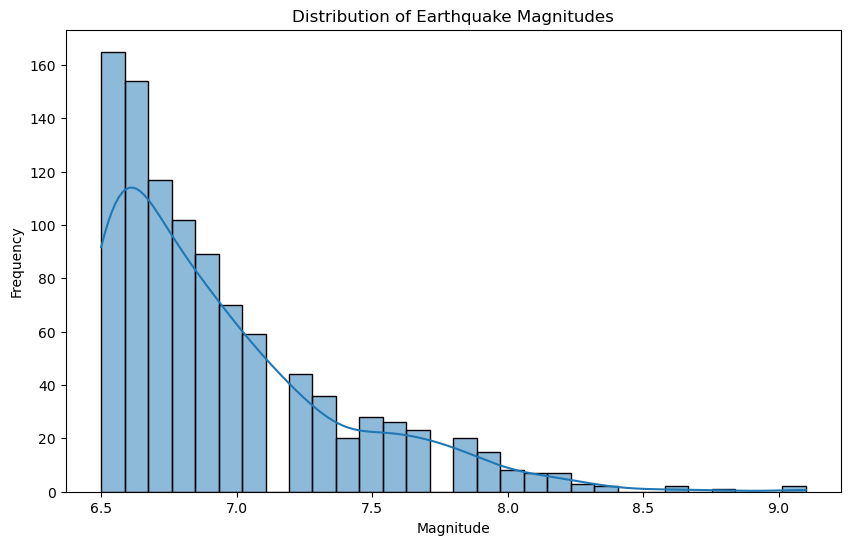

In [57]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['magnitude'], bins=30, kde=True)
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()


In [58]:
# Install folium in Jupyter Notebook
!pip install folium


In [60]:
import folium
from folium.plugins import HeatMap


In [67]:
# Load the dataset
file_path = 'earthquake_1995-2023.csv'
earthquake_data = pd.read_csv(file_path)

# Drop rows with missing latitude or longitude values
earthquake_data = earthquake_data.dropna(subset=['latitude', 'longitude'])

# Calculate the map center
map_center = [earthquake_data['latitude'].mean(), earthquake_data['longitude'].mean()]

# Create a heatmap
heatmap = folium.Map(location=map_center, zoom_start=2)
HeatMap(earthquake_data[['latitude', 'longitude']].values, radius=8).add_to(heatmap)

# Save the heatmap to an HTML file
heatmap.save("earthquake_heatmap.html")

print("Heatmap saved as 'earthquake_heatmap.html'")



Heatmap saved as 'earthquake_heatmap.html'


In [68]:
# Feature Engineering
features = ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'nst', 'gap', 'dmin']
target = 'tsunami'


In [71]:
# Remove rows with missing target values
df = df.dropna(subset=[target])
df

,title,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,2023-08-16 12:47:00,7,4,0,657,9,114,7.177000,25.0,8,192.955,-13.8814,167.1580
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,2023-07-19 00:22:00,8,6,0,775,9,92,0.679000,40.0,8,69.727,12.8140,-88.1265
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,2023-07-17 03:05:00,7,5,0,899,9,70,1.634000,28.0,8,171.371,-38.1911,-70.3731
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,2023-07-16 06:48:00,6,6,1,860,9,173,0.907000,36.0,8,32.571,54.3844,-160.6990
4,M 7.3 - Alaska Peninsula,7.3,2023-07-16 06:48:00,0,5,1,820,1,79,0.879451,172.8,0,21.000,54.4900,-160.7960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,1995-05-27 13:03:00,0,9,0,776,9,0,0.000000,0.0,6,11.000,52.6290,142.8270
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,1995-05-16 20:12:00,0,4,0,912,9,0,0.000000,0.0,5,20.200,-23.0080,169.9000
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,1995-05-14 11:33:00,0,6,0,732,9,0,0.000000,0.0,5,11.200,-8.3780,125.1270
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,1995-05-13 08:47:00,0,9,0,670,9,0,0.000000,0.0,5,14.000,40.1490,21.6950


In [72]:
X = df[features]
y = df[target]



In [74]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


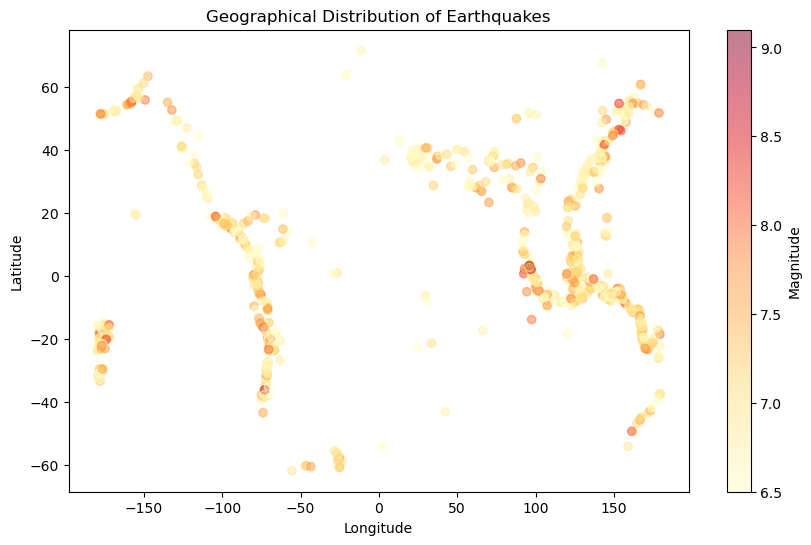

In [75]:
# Load the dataset
file_path = 'earthquake_1995-2023.csv'
earthquake_data = pd.read_csv(file_path)

# Drop rows with missing latitude, longitude, or magnitude
earthquake_data = earthquake_data.dropna(subset=['latitude', 'longitude', 'magnitude'])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    earthquake_data['longitude'], earthquake_data['latitude'], 
    alpha=0.5, c=earthquake_data['magnitude'], cmap='YlOrRd'
)
plt.colorbar(label='Magnitude')
plt.title('Geographical Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [76]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


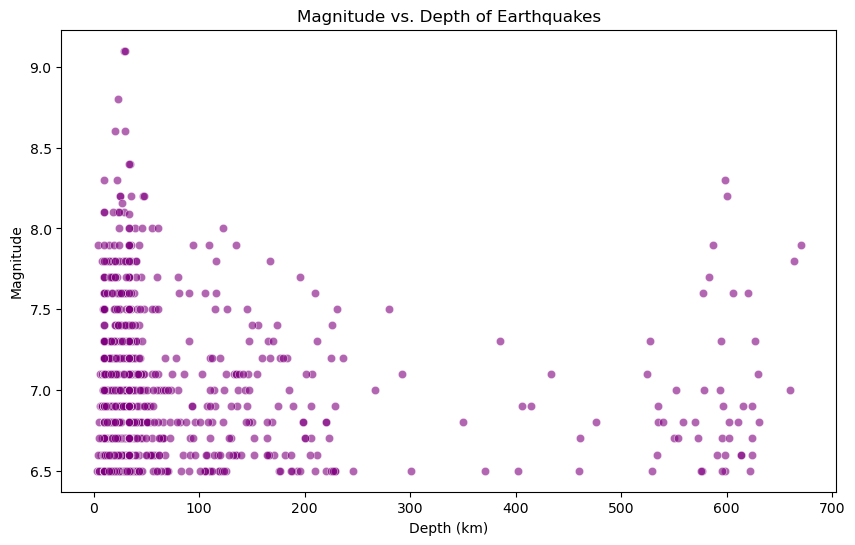

In [77]:
# Plot Magnitude vs. Depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['depth'], y=df['magnitude'], alpha=0.6, color='purple')

# Add labels and title
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Depth of Earthquakes")

# Show the plot
plt.show()

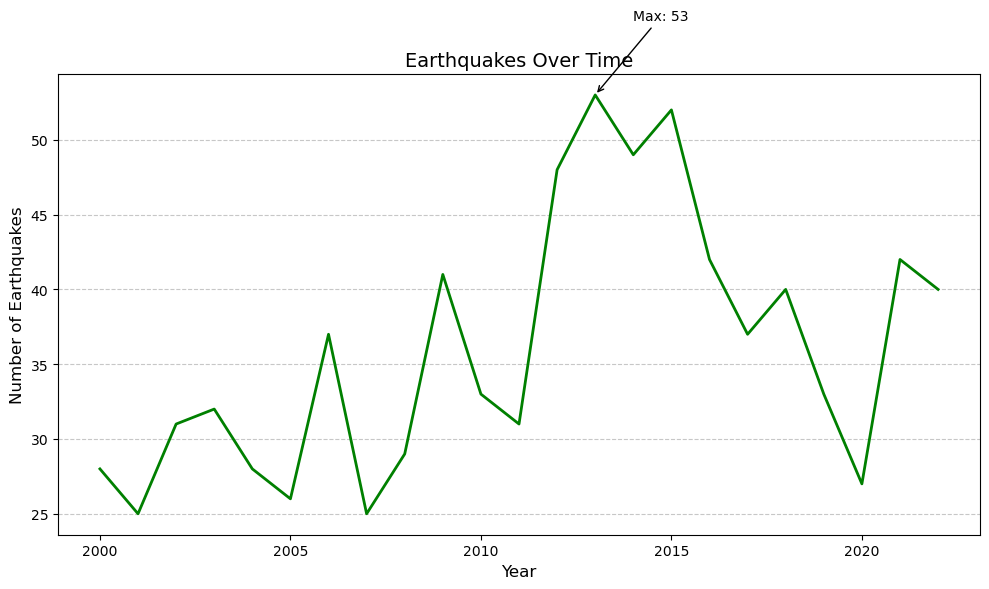

In [78]:
# Data (replace with your actual data)
years = np.arange(2000, 2023)  # 23 years from 2000 to 2022
earthquake_counts = np.array([
    28, 25, 31, 32, 28, 26, 37, 25, 29, 41, 33, 31, 48, 53, 49, 52, 42, 37, 40,
    33, 27, 42, 40
])  # Example data - adjust as needed

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(years, earthquake_counts, color='green', linewidth=2)

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.title('Earthquakes Over Time', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a subtle grid
plt.xticks(np.arange(min(years), max(years) + 1, 5))  # Set x-axis ticks every 5 years

# Add annotations (optional - for highlighting specific points)
# Example: Annotate the highest point
max_index = np.argmax(earthquake_counts)
plt.annotate(f'Max: {earthquake_counts[max_index]}', 
             xy=(years[max_index], earthquake_counts[max_index]),
             xytext=(years[max_index] + 1, earthquake_counts[max_index] + 5),  # Adjust text position
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=10)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [79]:
# Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [80]:
# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       134
           1       0.76      0.82      0.79        66

    accuracy                           0.85       200
   macro avg       0.83      0.85      0.84       200
weighted avg       0.86      0.85      0.86       200

